In [3]:
#Task 1: Data Preparation
#importing pandas and numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree

#importing online_shoppers_intention.xlsx
osi_input = 'online_shoppers_intention.xlsx'
# creating osi_df dataframe and assigning it to excel input
osi_df = pd.read_excel(osi_input)
print(osi_df.info())
#setting max rows and columns
pd.options.display.max_rows = 300
pd.options.display.max_columns = 100
#checking the values
print(osi_df.head())
print(osi_df.tail())
#checking NA and NULL values
osi_df.isna().sum()
osi_df.isnull().sum()
print(osi_df.describe())

#removing duplicate rows
print("Data frame shape with duplicates:") 
print(osi_df.shape)
print("Data frame shape without duplicates:") 
# copying original data frame to fake_osi_df without duplicates
fake_osi_df = osi_df.drop_duplicates()
print(fake_osi_df.shape)
print("Data frame without duplicates:") 

#Assigning appropriate datatypes 
fake_osi_df = fake_osi_df.astype({ "Browser":'category',"Month":'category',"OperatingSystems":'category', "Region":'category', "TrafficType":'category',"VisitorType":'category'}) 

print(fake_osi_df['Browser'].value_counts(dropna=False))
print(fake_osi_df['Month'].value_counts(dropna=False))
print(fake_osi_df['OperatingSystems'].value_counts(dropna=False))
print(fake_osi_df['Region'].value_counts(dropna=False))
print(fake_osi_df['TrafficType'].value_counts(dropna=False))
print(fake_osi_df['VisitorType'].value_counts(dropna=False))
print(fake_osi_df['Weekend'].value_counts(dropna=False))
print(fake_osi_df['Revenue'].value_counts(dropna=False))
print(fake_osi_df.info())
print(fake_osi_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

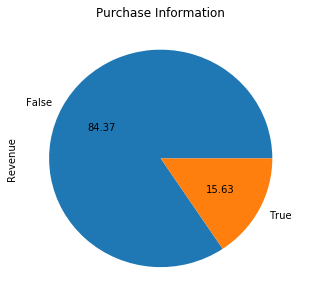

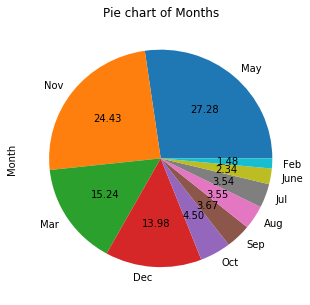

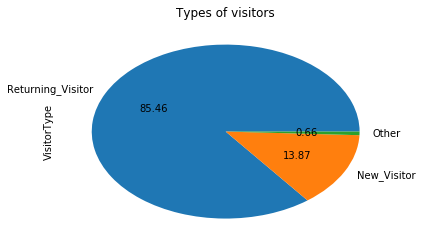

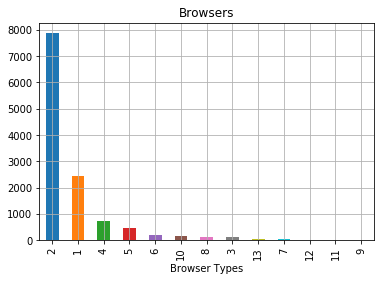

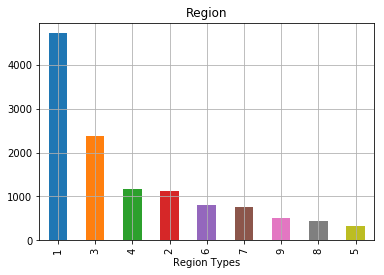

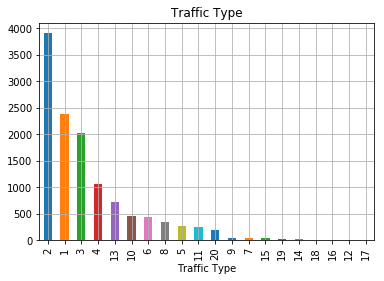

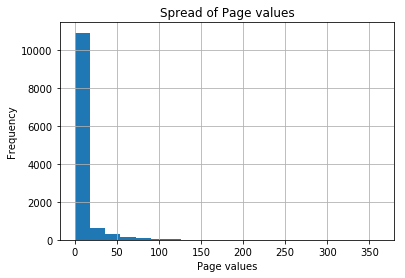

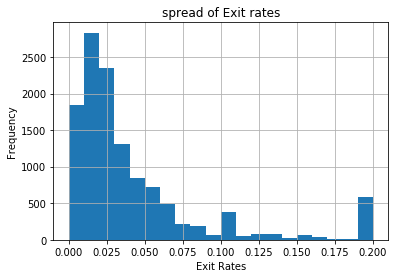

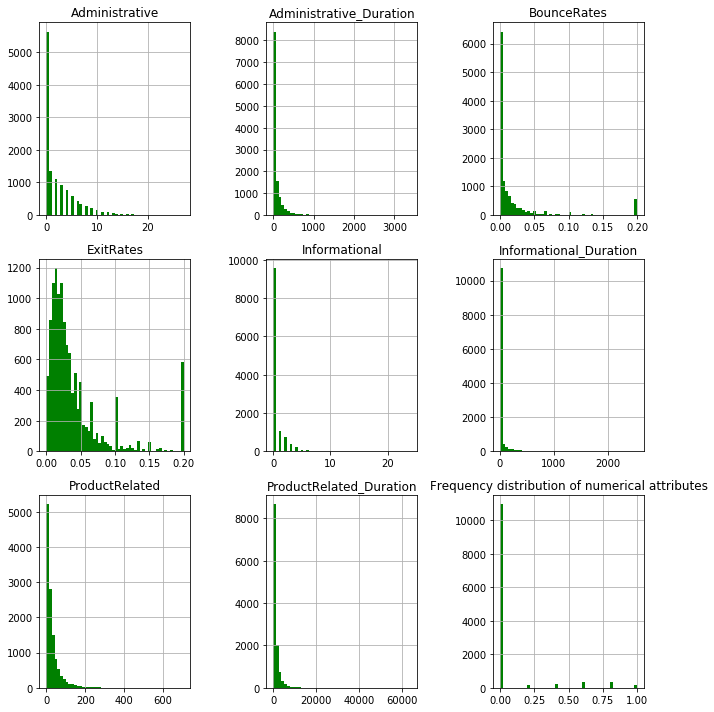

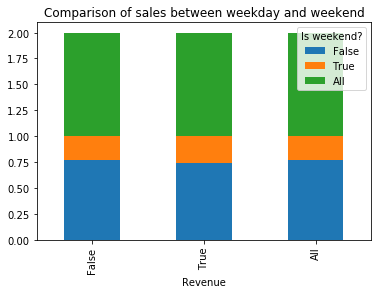

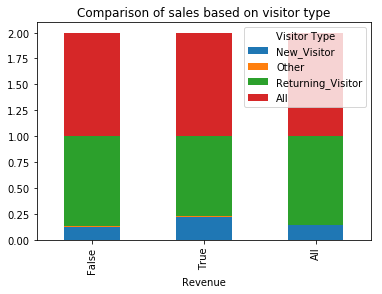

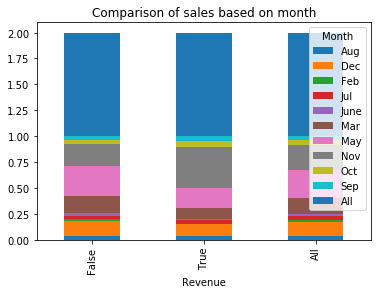

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.600457   
Administrative_Duration        0.600457                 1.000000   
Informational                  0.375256                 0.301419   
Informational_Duration         0.254813                 0.237211   
ProductRelated                 0.428305                 0.286863   
ProductRelated_Duration        0.371146                 0.353583   
BounceRates                   -0.213096                -0.136913   
ExitRates                     -0.311255                -0.201971   
PageValues                     0.097017                 0.066228   
SpecialDay                    -0.096951                -0.074666   
Weekend                        0.023825                 0.013259   
Revenue                        0.136330                 0.091768   

                         Informational  Informational_Duration  \
Administrative                0.375256           

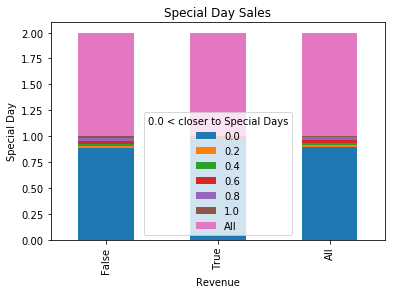

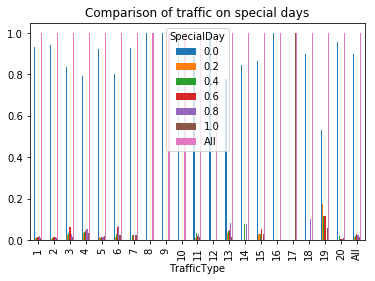

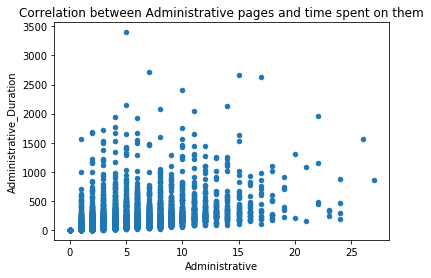

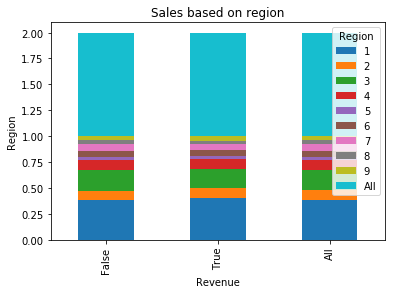

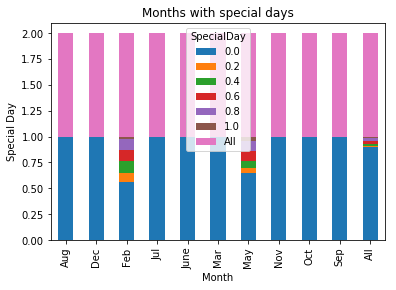

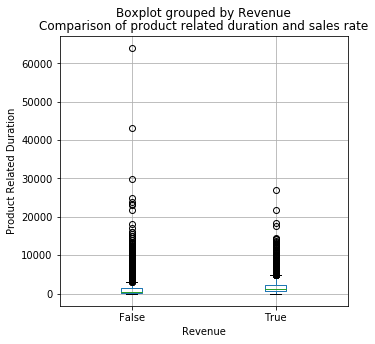

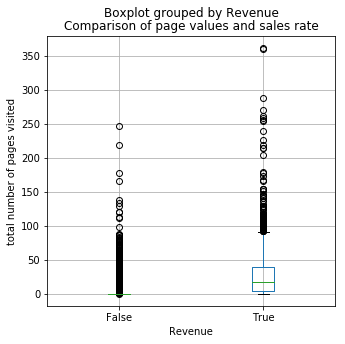

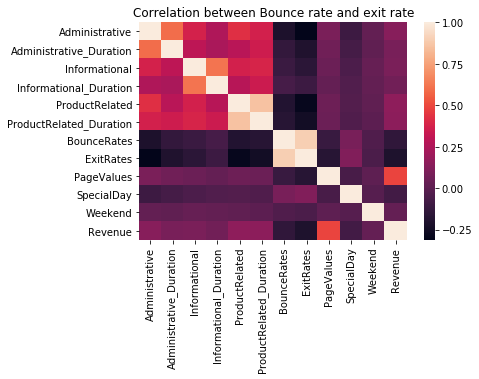

In [5]:
# Task 2: Data Exploration

fake_osi_df['Revenue'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%.2f')
plt.title('Purchase Information')
plt.show()

fake_osi_df['Month'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%.2f')
plt.title('Pie chart of Months')
plt.show()

fake_osi_df['VisitorType'].value_counts().plot(kind='pie',autopct='%.2f') 
plt.title('Types of visitors')
plt.show()


#ordinal - bar graph
fake_osi_df['Browser'].value_counts().plot(kind='bar') 
plt.title('Browsers')
plt.xlabel('Browser Types')
plt.grid()
plt.show()

fake_osi_df['Region'].value_counts().plot(kind='bar') 
plt.title('Region')
plt.xlabel('Region Types')
plt.grid()
plt.show()

fake_osi_df['TrafficType'].value_counts().plot(kind='bar') 
plt.title('Traffic Type')
plt.xlabel('Traffic Type')
plt.grid()
plt.show()

#numerical - histogram
fake_osi_df['PageValues'].plot(kind='hist',bins=20) 
plt.title('Spread of Page values')
plt.xlabel('Page values')
plt.grid()
plt.show()

fake_osi_df['ExitRates'].plot(kind='hist',bins=20) 
plt.title('spread of Exit rates')
plt.xlabel('Exit Rates')
plt.grid()
plt.show()


 # Identifying the Variables with high percentage of outliers. To observe the frequency distribution.
fake_osi_df[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates', 'ExitRates','SpecialDay']].hist(figsize=(10,10),bins=50,color='G')
plt.title('Frequency distribution of numerical attributes')
plt.tight_layout()

#For Percentage conversion
def percentage(ser):
  return ser/float(ser[-1])

#Hypothesis 1: Most products sold on weekend?
week_plot=(pd.crosstab(fake_osi_df["Revenue"],fake_osi_df["Weekend"],margins=True).apply(percentage, axis=1))
week_plot.plot.bar(stacked=True)
plt.legend(title='Is weekend?')
plt.title('Comparison of sales between weekday and weekend')
plt.show()



#Hypothesis 2: Which type of visiter buys more
visitor_sales=(pd.crosstab(fake_osi_df["Revenue"],fake_osi_df["VisitorType"],margins=True).apply(percentage, axis=1))
visitor_sales.plot.bar(stacked=True)
plt.legend(title='Visitor Type')
plt.title('Comparison of sales based on visitor type')
plt.show()

#Hypothesis 3: Sales is high on which month
month_sales = (pd.crosstab(fake_osi_df["Revenue"],fake_osi_df["Month"],margins=True).apply(percentage, axis=1))
month_sales.plot.bar(stacked=True)
plt.legend(title='Month')
plt.title('Comparison of sales based on month')
plt.show()


#Hypothesis 4: Can special day affect Sales
special_day_sales = (pd.crosstab(fake_osi_df["Revenue"],fake_osi_df["SpecialDay"],margins=True).apply(percentage, axis=1))
special_day_sales.plot.bar(stacked=True)
plt.legend(title='0.0 < closer to Special Days')
plt.title('Special Day Sales')
plt.ylabel('Special Day')


#Hypothesis 5: Is traffic affected on special days 
special_day_traffic = (pd.crosstab(fake_osi_df["TrafficType"],fake_osi_df["SpecialDay"],margins=True).apply(percentage, axis=1))
special_day_traffic.plot.bar()
plt.title('Comparison of traffic on special days')

#Hypothesis 6:  Administrative and Administrative Duration correlated
fake_osi_df.plot(kind='scatter',x='Administrative',y='Administrative_Duration')
plt.title('Correlation between Administrative pages and time spent on them')

#Hypothesis 7: Which region has more sales
region_sales=(pd.crosstab(fake_osi_df["Revenue"],fake_osi_df["Region"],margins=True).apply(percentage, axis=1))
region_sales.plot.bar(stacked=True)
plt.title('Sales based on region')
plt.ylabel('Region')

#Hypothesis 8: Which month has most special days
month_with_special=(pd.crosstab(fake_osi_df["Month"],fake_osi_df["SpecialDay"],margins=True).apply(percentage, axis=1))
month_with_special
month_with_special.plot.bar(stacked=True)
plt.title('Months with special days')
plt.ylabel('Special Day')

#Hypothesis 9: Spending more time on product related views leads to purchase
product_time_sales=pd.crosstab(fake_osi_df["Revenue"],fake_osi_df["ProductRelated_Duration"],margins=True).apply(percentage, axis=1)
product_time_sales
fake_osi_df.dropna().boxplot(column='ProductRelated_Duration', by='Revenue',figsize=(5,5))
plt.title('Comparison of product related duration and sales rate')
plt.ylabel('Product Related Duration')


#Hypothesis 10: user who visits more pages always makes a purchase
page_sales = pd.crosstab(fake_osi_df["Revenue"],fake_osi_df["PageValues"],margins=True).apply(percentage, axis=1)
page_sales
fake_osi_df.dropna().boxplot(column='PageValues', by='Revenue',figsize=(5,5))
plt.title('Comparison of page values and sales rate')
plt.ylabel('total number of pages visited')

#Hypothesis 11:  Bounce rates and exit rates correlated
fake_osi_df.plot(kind='scatter',x='BounceRates',y='ExitRates')
plt.title('Correlation between Bounce rate and exit rate')


#Hypothesis 12: Users spent more time on viewig products
fake_osi_df.describe()




# correlation matrix
corr = fake_osi_df.corr()
print(corr)
# heatmap plot
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
#Code goes after this line
#from pandas.tools.plotting import scatter_matrix

#scatter_matrix(fake_osi_df,alpha=0.2,figsize=(26,26),diagonal='hist')
#plt.show()

In [6]:
#Data Modelling - classifier task


# K- Nearest Neighbor classifier

#Defining the feature set for KNN algorithm
X = np.array(fake_osi_df.drop(['Revenue','Month','VisitorType', 'Weekend','OperatingSystems', 'Browser','Region','TrafficType'], 1))

#Defining the label set
Y = np.array(fake_osi_df['Revenue'])

# Splitting the data set in to training(80%) and testing(20%) data sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# n=2, weights= 'uniform', Manhatten Distance
clf=KNeighborsClassifier(2, 'uniform',p=1)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.2,n=2,weights='uniform',p=1)= ", accuracy_score(Y_test, predicted)*100

# n=2, weights= 'distance', Manhatten Distance
clf=KNeighborsClassifier(2, 'distance',p=1)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.2,n=2,weights= 'distance',p=1)= ", accuracy_score(Y_test, predicted)*100

# n=3, weights= 'uniform', Manhatten Distance
clf=KNeighborsClassifier(3, 'uniform',p=1)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.2,n=3,weights='uniform',p=1)= ", accuracy_score(Y_test, predicted)*100

# n=3, weights= 'distance', Manhatten Distance
clf=KNeighborsClassifier(3, 'distance',p=1)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.2,n=3,weights='distance',p=1)= ", accuracy_score(Y_test, predicted)*100

# n=2, weights= 'uniform', Euclidean Distance
clf=KNeighborsClassifier(2, 'uniform',p=2)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.2,n=2,weights='uniform',p=2)= ", accuracy_score(Y_test, predicted)*100

# n=2, weights= 'distance', Euclidean Distance
clf=KNeighborsClassifier(2, 'distance',p=2)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.2,n=2, weights='distance',p=2)= ", accuracy_score(Y_test, predicted)*100

# n=3, weights= 'uniform', Euclidean Distance
clf=KNeighborsClassifier(3, 'uniform',p=2)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.2,n=3,weights='uniform',p=2)= ", accuracy_score(Y_test, predicted)*100

# n=3, weights= 'distance', Euclidean Distance
clf=KNeighborsClassifier(3, 'distance',p=2)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.2,n=3,weights='distance',p=2)= ", accuracy_score(Y_test, predicted)*100

# Splitting the data set in to training(60%) and testing(40%) data sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

# n=2, weights= 'uniform', Manhatten Distance
clf=KNeighborsClassifier(2, 'uniform',p=1)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.4,n=2,weights='uniform',p=1)= ", accuracy_score(Y_test, predicted)*100

# n=2, weights= 'distance', Manhatten Distance
clf=KNeighborsClassifier(2, 'distance',p=1)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.4,n=2,weights= 'distance',p=1)= ", accuracy_score(Y_test, predicted)*100

# n=3, weights= 'uniform', Manhatten Distance
clf=KNeighborsClassifier(3, 'uniform',p=1)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.4,n=3,weights='uniform',p=1)= ", accuracy_score(Y_test, predicted)*100

# n=3, weights= 'distance', Manhatten Distance
clf=KNeighborsClassifier(3, 'distance',p=1)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.4,n=3,weights='distance',p=1)= ", accuracy_score(Y_test, predicted)*100

# n=2, weights= 'uniform', Euclidean Distance
clf=KNeighborsClassifier(2, 'uniform',p=2)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.4,n=2,weights='uniform',p=2)= ", accuracy_score(Y_test, predicted)*100

# n=2, weights= 'distance', Euclidean Distance
clf=KNeighborsClassifier(2, 'distance',p=2)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.4,n=2, weights='distance',p=2)= ", accuracy_score(Y_test, predicted)*100

# n=3, weights= 'uniform', Euclidean Distance
clf=KNeighborsClassifier(3, 'uniform',p=2)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.4,n=3,weights='uniform',p=2)= ", accuracy_score(Y_test, predicted)*100

# n=3, weights= 'distance', Euclidean Distance
clf=KNeighborsClassifier(3, 'distance',p=2)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.4,n=3,weights='distance',p=2)= ", accuracy_score(Y_test, predicted)*100

# Splitting the data set in to training(50%) and testing(50%) data sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

# n=2, weights= 'uniform', Manhatten Distance
clf=KNeighborsClassifier(2, 'uniform',p=1)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.5,n=2,weights='uniform',p=1)= ", accuracy_score(Y_test, predicted)*100

# n=2, weights= 'distance', Manhatten Distance
clf=KNeighborsClassifier(2, 'distance',p=1)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.5,n=2,weights= 'distance',p=1)= ", accuracy_score(Y_test, predicted)*100

# n=3, weights= 'uniform', Manhatten Distance
clf=KNeighborsClassifier(3, 'uniform',p=1)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.5,n=3,weights='uniform',p=1)= ", accuracy_score(Y_test, predicted)*100

# n=3, weights= 'distance', Manhatten Distance
clf=KNeighborsClassifier(3, 'distance',p=1)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.5,n=3,weights='distance',p=1)= ", accuracy_score(Y_test, predicted)*100

# n=2, weights= 'uniform', Euclidean Distance
clf=KNeighborsClassifier(2, 'uniform',p=2)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

# n=2, weights= 'distance', Euclidean Distance
clf=KNeighborsClassifier(2, 'distance',p=2)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.5,n=2, weights='distance',p=2)= ", accuracy_score(Y_test, predicted)*100

# n=3, weights= 'uniform', Euclidean Distance
clf=KNeighborsClassifier(3, 'uniform',p=2)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)

print "Accuracy for (test_size=0.5,n=3,weights='uniform',p=2)= ", accuracy_score(Y_test, predicted)*100

# n=3, weights= 'distance', Euclidean Distance
clf=KNeighborsClassifier(3, 'distance',p=2)
fit=clf.fit(X_train, Y_train)
predicted = fit.predict(X_test)
confusion_matrix(Y_test, predicted)
 
print "Accuracy for (test_size=0.5,n=3, weights='distance',p=2)= ", accuracy_score(Y_test, predicted)*100

Accuracy for (test_size=0.2,n=2,weights='uniform',p=1)=  85.86644817697665
Accuracy for (test_size=0.2,n=2,weights= 'distance',p=1)=  83.61327324866858
Accuracy for (test_size=0.2,n=3,weights='uniform',p=1)=  85.62064727570667
Accuracy for (test_size=0.2,n=3,weights='distance',p=1)=  85.41581319131504
Accuracy for (test_size=0.2,n=2,weights='uniform',p=2)=  86.07128226136828
Accuracy for (test_size=0.2,n=2, weights='distance',p=2)=  82.99877099549366
Accuracy for (test_size=0.2,n=3,weights='uniform',p=2)=  85.41581319131504
Accuracy for (test_size=0.2,n=3,weights='distance',p=2)=  85.17001229004507
Accuracy for (test_size=0.4,n=2,weights='uniform',p=1)=  85.74354772634166
Accuracy for (test_size=0.4,n=2,weights= 'distance',p=1)=  82.89635395329783
Accuracy for (test_size=0.4,n=3,weights='uniform',p=1)=  85.4977468250717
Accuracy for (test_size=0.4,n=3,weights='distance',p=1)=  85.4362965997542
Accuracy for (test_size=0.4,n=2,weights='uniform',p=2)=  85.96886521917247
Accuracy for (test

In [7]:
#Decision tree

#Defining the feature set for Decision tree algorithm
X1 = np.array(fake_osi_df.drop(['Revenue','Month','VisitorType'], 1))

#Defining the label set
Y1 = np.array(fake_osi_df['Revenue'])
 
# Splitting the data set in to training(80%) and testing(20%) data sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2)

# Decision tree (Criterion="gini",maximum depth=4)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=4, min_samples_leaf=6)
clf_gini.fit(X1_train, Y1_train)
Y1_pred = clf_gini.predict(X1_test)
print(confusion_matrix(Y1_test, Y1_pred))  
print(classification_report(Y1_test, Y1_pred))

print "Accuracy for (test_size=0.2,maximum depth=4) ", accuracy_score(Y1_test, Y1_pred)*100

# Decision tree (Criterion="gini",maximum depth=5)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=6)
clf_gini.fit(X1_train, Y1_train)
Y1_pred = clf_gini.predict(X1_test)
print(confusion_matrix(Y1_test, Y1_pred))  
print(classification_report(Y1_test, Y1_pred))

print "Accuracy for (test_size=0.2,maximum depth=5) ", accuracy_score(Y1_test, Y1_pred)*100

# Decision tree (Criterion="gini",maximum depth=6)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=6, min_samples_leaf=6)
clf_gini.fit(X1_train, Y1_train)
Y1_pred = clf_gini.predict(X1_test)
print(confusion_matrix(Y1_test, Y1_pred))  
print(classification_report(Y1_test, Y1_pred))

print "Accuracy for (test_size=0.2,maximum depth=6) ", accuracy_score(Y1_test, Y1_pred)*100

# Splitting the data set in to training(60%) and testing(40%) data sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.4)

# Decision tree (Criterion="gini",maximum depth=4)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=4, min_samples_leaf=6)
clf_gini.fit(X1_train, Y1_train)
Y1_pred = clf_gini.predict(X1_test)
print(confusion_matrix(Y1_test, Y1_pred))  
print(classification_report(Y1_test, Y1_pred))

print "Accuracy for (test_size=0.4,maximum depth=4) ", accuracy_score(Y1_test, Y1_pred)*100

# Decision tree (Criterion="gini",maximum depth=5)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=6)
clf_gini.fit(X1_train, Y1_train)
Y1_pred = clf_gini.predict(X1_test)
print(confusion_matrix(Y1_test, Y1_pred))  
print(classification_report(Y1_test, Y1_pred))

print "Accuracy for (test_size=0.4,maximum depth=5) ", accuracy_score(Y1_test, Y1_pred)*100

# Decision tree (Criterion="gini",maximum depth=6)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=6, min_samples_leaf=6)
clf_gini.fit(X1_train, Y1_train)
Y1_pred = clf_gini.predict(X1_test)
print(confusion_matrix(Y1_test, Y1_pred))  
print(classification_report(Y1_test, Y1_pred))

print "Accuracy for (test_size=0.4,maximum depth=6) ", accuracy_score(Y1_test, Y1_pred)*100

# Splitting the data set in to training(50%) and testing(50%) data sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.5)

# Decision tree (Criterion="gini",maximum depth=4)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=4, min_samples_leaf=6)
clf_gini.fit(X1_train, Y1_train)
Y1_pred = clf_gini.predict(X1_test)
print(confusion_matrix(Y1_test, Y1_pred))  
print(classification_report(Y1_test, Y1_pred))

print "Accuracy for (test_size=0.5,maximum depth=4) ", accuracy_score(Y1_test, Y1_pred)*100

# Decision tree (Criterion="gini",maximum depth=5)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=6)
clf_gini.fit(X1_train, Y1_train)
Y1_pred = clf_gini.predict(X1_test)
print(confusion_matrix(Y1_test, Y1_pred))  
print(classification_report(Y1_test, Y1_pred))

print "Accuracy for (test_size=0.5,maximum depth=5) ", accuracy_score(Y1_test, Y1_pred)*100

# Decision tree (Criterion="gini",maximum depth=6)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=6, min_samples_leaf=6)
clf_gini.fit(X1_train, Y1_train)
Y1_pred = clf_gini.predict(X1_test)
print(confusion_matrix(Y1_test, Y1_pred))  
print(classification_report(Y1_test, Y1_pred))

print "Accuracy for (test_size=0.5,maximum depth=6) ", accuracy_score(Y1_test, Y1_pred)*100

[[1989   80]
 [ 166  206]]
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2069
        True       0.72      0.55      0.63       372

   micro avg       0.90      0.90      0.90      2441
   macro avg       0.82      0.76      0.78      2441
weighted avg       0.89      0.90      0.89      2441

Accuracy for (test_size=0.2,maximum depth=4)  89.92216304793118
[[1961  108]
 [ 156  216]]
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      2069
        True       0.67      0.58      0.62       372

   micro avg       0.89      0.89      0.89      2441
   macro avg       0.80      0.76      0.78      2441
weighted avg       0.89      0.89      0.89      2441

Accuracy for (test_size=0.2,maximum depth=5)  89.18476034412126
[[1948  121]
 [ 147  225]]
              precision    recall  f1-score   support

       False       0.93      0.94      0.94      2069
        True       0.65     